![Tanque%20de%20Resfriamento.png](../assets/TanqueDeResfriamento.png)
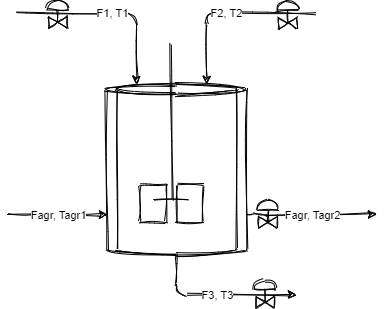

### EDO 1:

$$ {dh \over dt} = {1 \over A}[{F_1 (t)} + {F_2 (t)} - {F_3 (t)}] $$

### EDO 2:

$$ {dT_3 \over dt} = {1 \over Ah} \biggr (-T_3 (F_1 + F_2)
+ F_1 T_1 + F_2 T_2 - {UA_{tt} \over \rho Cp}(T_3 - T_{agr_2})\biggl) $$

### EDO 3:

$$ {dT_{agr_2} \over dt} = {1 \over V_c} \biggr(F_{agr}(T_{agr_1} - T_{agr_2}) 
+ {UA_{tt} \over \rho Cp}(T_3 - T_{agr_2}) \biggl) $$

In [619]:
#Hipóteses:
#CSTR e Tanque Cilíndrico
#Densidade constante para os fluidos da camisa e do tanque (mesmo fluido)
#Volume da camisa constante e completamente cheia ---> Fagr1 = Fagr2 = Fagr
#Cp fluido da camisa = Cp fluido do tanque
#Energia potencial e cinética desprezíveis frente à energia interna

In [11]:
import matplotlib.pyplot as plt        #biblioteca gráfica

#----------------Parâmetros
A = 10 #10 #m²
U = 419000 #419000 #J/kg
Att = 20 #20 #m²
rho = 958 #958 #kg/m³
cp = 4220 #4220 #J/(kgK)
vc = 100 #100 #m³

#----------------Entradas (Variáveis de entrada no estado estacionário t = 0)
F1_estacionario = 1 #m³/s
F2_estacionario = 1 #m³/s
Fagr_estacionario = 5 #m³/s
T1_estacionario = 473 #K
T2_estacionario = 573 #K
Tagr1_estacionario = 303 #K

#----------------Entradas (Variação conhecida das variáveis de entrada após a perturbação do estado estacionário)
F1 = lambda t: F1_estacionario + 0.5/(t+1)
F2 = lambda t: F2_estacionario + 0.5/(t+1)
F3 = lambda t: 1 if t < 5 else F1(t)+F2(t)
Fagr = lambda t: Fagr_estacionario + 0.2/(t+1)
T1 = lambda t: T1_estacionario
T2 = lambda t: T2_estacionario if t < 2 else T2_estacionario + 100/(t+1)
Tagr1 = lambda t: Tagr1_estacionario

#----------------Saídas (Valor conhecido das variáveis de saída após a perturbação do estado estacionário)
h_estacionario = 10 #m
T3_estacionario = 373 #K
Tagr2_estacionario = 373 #K

[Método Runge-Kutta](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta) 4º ordem para resolver um problema de valor inicial (PVI):

$$ y'(t) = f(t, y)$$  
$$y_{_0}(t) = t_{_0}$$   
$$y_{n+1} = y_n + {h \over 6}(k_1 + 2k_2 + 2k_3 + k_4)$$  
$$k_1 = f(t_n, y_n)$$  
$$k_2 = f \Bigg (t_n + {h \over 2}, y_n + {h \over 2} k_1 \Bigg) $$  
$$k_3 = f \Bigg (t_n + {h \over 2}, y_n + {h \over 2} k_2 \Bigg) $$  
$$k_4 = f (t_n + h, y_n + h k_3) $$

Sugestão de resolução:

1. Crie as funções $dhdt$, $dt3dt$ e $dtagr2dt$ que recebe todas variáveis da respectiva EDO e gera um valor.
2. Crie a função $rungekutta$ que é capaz de gerar $y_{n+1}$
3. Gere novos $y_{n+1}$ enquanto houver valores de $t$, numa lista de tempos usada como input.
4. Guarde todos os valores de $y$, numa lista.
    1. Utilize uma lista para cada uma das variáveis.
5. Usa os resultados da lista para plotar o gráfico


In [5]:
def rungekutta(f, y0, ts):   
    ys = [y0]
    for i in range(1, len(ts)):
        h = ts[i] - ts[i-1]        
        k1 = f(ts[i-1], ys[i-1])
        k2 = f(ts[i-1] + h/2, ys[i-1] + h*k1/2)
        k3 = f(ts[i-1] + h/2, ys[i-1] + h*k2/2)
        k4 = f(ts[i-1] + h, ys[i-1] + h*k3)
        
        y = ys[i-1] + h/6*(k1 + 2*k2 + 2*k3 + k4)
        ys.append(y)
    
    return ys

def odes_naolineares(p, t):
    h, T3, Tagr2 = p[0], p[1], p[2]   
    
    dhdt = (F1(t) + F2(t) - F3(t))/A    
    dt3dt = ((1/A/h) * (-T3*(F1(t)+F2(t)) + F1(t)*T1(t) + F2(t)*T2(t) - U*Att*(T3 - Tagr2)/(rho*cp)))
    dtagr2dt = (1/vc) * (Fagr(t)*(Tagr1(t)-Tagr2) + U*Att*(T3-Tagr2)/(rho*cp))
    
    return [dhdt, dt3dt, dtagr2dt]



p = [h_estacionario, T3_estacionario, Tagr2_estacionario] #valores das variáveis de saída do estado estacionário
tempos: list # espaço de tempo após a perturbação em t = 0 que será analisaddo
listaAlturas: list # guarde seus resultados para h aqui
listaT3: list # guarde seus resultados para T3 aqui
listaTagr2: list # guarde seus resultados para Tagr2 aqui

Text(0, 0.5, 'vazão volumétrica (m³/s)')

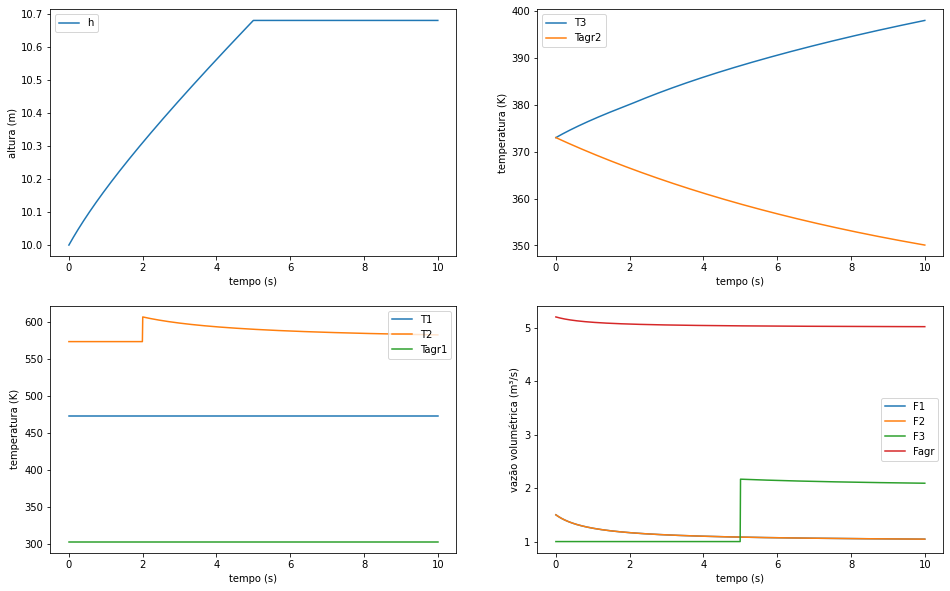

In [6]:
figura = plt.figure(figsize = (16, 10)) #gráficos pelo modelo não linear

grafico1 = figura.add_subplot(2, 2, 1) #plot do gráfico 'altura x tempo'
#grafico1.plot(tempos, listaAlturas)
grafico1.legend(['Altura'])
grafico1.set_xlabel('tempo (s)')
grafico1.set_ylabel('altura (m)')

grafico2 = figura.add_subplot(2, 2, 2) #plot do gráfico 'T3 e Tagr2 x tempo'
#grafico2.plot(tempos, T3)
#grafico2.plot(tempos, Tagr2)
grafico2.legend(['T3', 'Tagr2'])
grafico2.set_xlabel('tempo (s)')
grafico2.set_ylabel('temperatura (K)')

grafico3 = figura.add_subplot(2, 2, 3) #comportamento temporal das temperaturas conhecidas (inputs T1, T2 e Tagr1)
#grafico3.plot(tempos, list(map(T1, t)))
#grafico3.plot(tempos, list(map(T2, t)))
#grafico3.plot(tempos, list(map(Tagr1, t)))
grafico3.legend(['T1', 'T2', 'Tagr1'])
grafico3.set_xlabel('tempo (s)')
grafico3.set_ylabel('temperatura (K)')

grafico4 = figura.add_subplot(2, 2, 4) #comportamento temporal das correntes conhecidas (inputs F1, F2 e Fagr)
#grafico4.plot(tempos, list(map(F1, t)))
#grafico4.plot(tempos, list(map(F2, t)))
#grafico4.plot(tempos, list(map(F3, t)))
#grafico4.plot(tempos, list(map(Fagr, t)))
grafico4.legend(['F1', 'F2', 'F3', 'Fagr'])
grafico4.set_xlabel('tempo (s)')
grafico4.set_ylabel('vazão volumétrica (m³/s)')